In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [2]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200604_h3k9me3'

In [3]:
file=f'{bigDir}\\cellinfo_200604v6.csv'

In [4]:
data=pd.read_csv(file)

# data visualizations 

In [7]:
data=data.drop(columns=['Unnamed: 0'])

In [8]:
data.head()

,file,original_name,movie,last frame movie position x,last frame movie position y,ab1 (Heterochromatin),ab1 ch,ab2 (MCM),ab2 ch,DAPI ch,...,outer_mcm_eu,nuc_DAPI_total,inner_DAPI_total,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu
0,20200604_cell_00.ciz,200604_09_15_63X.czi,200604xy09,325.986,135.825,H3K9Me3,1,MCM2,2,3,...,9.910869e+08,2.697250e+09,822467048.0,1.874783e+09,1.126944e+09,688993863.0,437950504.0,1.570306e+09,133473185.0,1.436832e+09
1,20200604_cell_01.ciz,200604_09_46_63X.czi,200604xy09,1103.256,483.760,H3K9Me3,1,MCM2,2,3,...,9.940740e+08,2.321032e+09,899578615.0,1.421453e+09,9.240528e+08,588082696.0,335970054.0,1.396979e+09,311495919.0,1.085483e+09
2,20200604_cell_02.ciz,200604_09_51_63X.czi,200604xy09,1865.490,559.814,H3K9Me3,1,MCM2,2,3,...,1.231345e+09,2.570708e+09,959263344.0,1.611445e+09,1.034817e+09,647156625.0,387659985.0,1.535892e+09,312106719.0,1.223785e+09
3,20200604_cell_03.ciz,200604_09_53_63X.czi,200604xy09,601.353,583.042,H3K9Me3,1,MCM2,2,3,...,5.490997e+08,2.176022e+09,779353206.0,1.396669e+09,8.454837e+08,555806131.0,289677561.0,1.330538e+09,223547075.0,1.106991e+09
4,20200604_cell_04.ciz,200604_09_58_63X.czi,200604xy09,1577.064,627.569,H3K9Me3,1,MCM2,2,3,...,6.885018e+08,2.687250e+09,828964429.0,1.858286e+09,1.025013e+09,598365413.0,426648006.0,1.662237e+09,230599016.0,1.431638e+09


# note

Plotting the G1 phase cells with molecular age that is **lower than 1.2**. 

## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


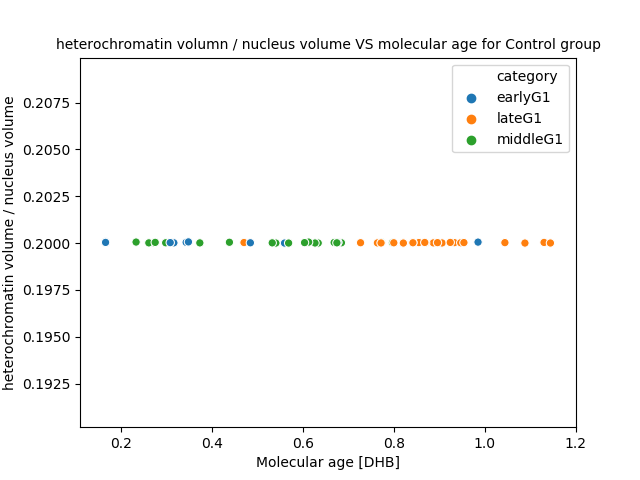

Text(0.5, 1.0, 'heterochromatin volumn / nucleus volume VS molecular age for Control group')

In [14]:
%matplotlib notebook
data['temp']=data.nuc_vol_het/data.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volumn / nucleus volume VS molecular age for Control group',fontsize=10)

## 2.	How is MCM signal changing with molecular age? 

<IPython.core.display.Javascript object>


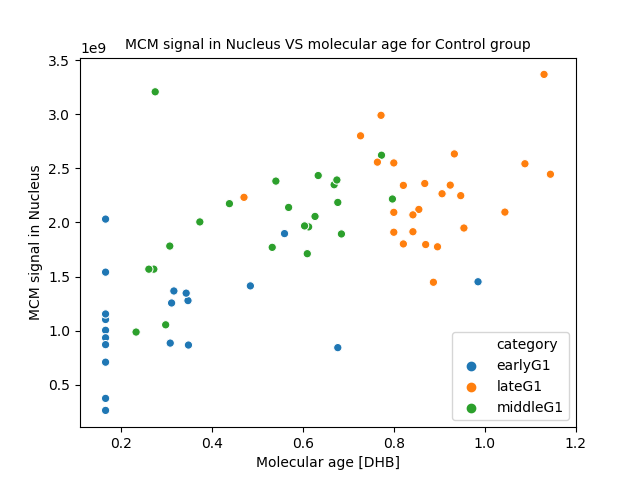

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age for Control group')

In [16]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age for Control group', fontsize=10)

## 3.	How is MCM signal changing in heterochromatin with molecular age?

<IPython.core.display.Javascript object>


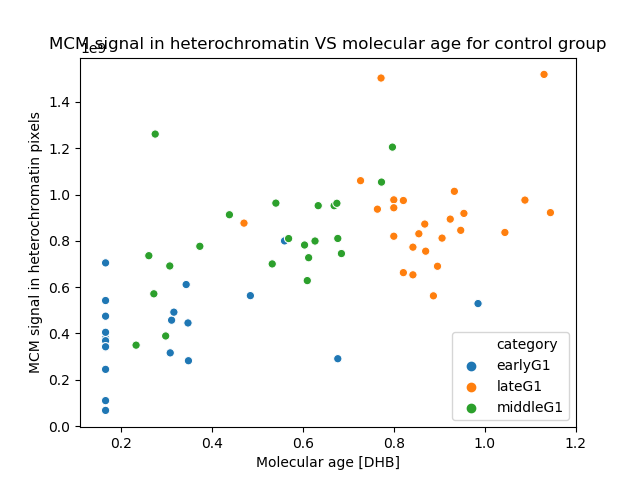

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age for control group')

In [17]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age for control group', fontsize=12)

## 4.	How is MCM signal changing in euchromatin with molecular age?

<IPython.core.display.Javascript object>


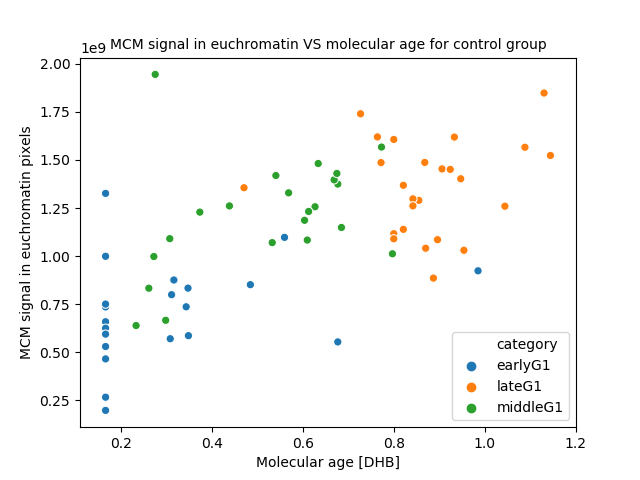

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age for control group')

In [18]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age for control group', fontsize=10)

## 5.	How does a proportion of MCM loaded in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


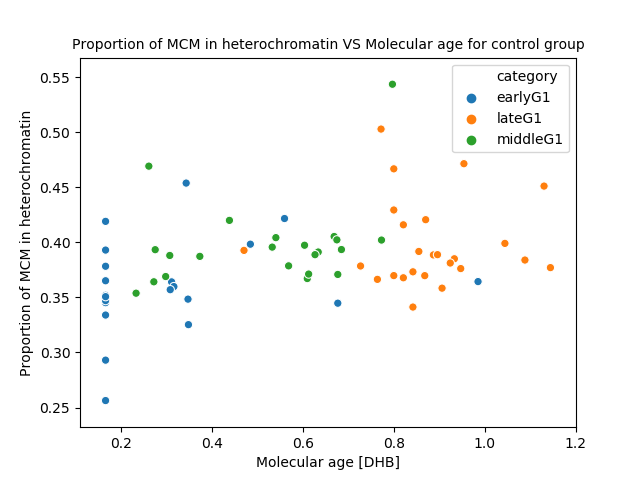

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age for control group')

In [19]:
%matplotlib notebook
data['temp']=data.nuc_mcm_het/data.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod <1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age for control group', fontsize=10)

## 6.	How does a proportion of MCM loaded in euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


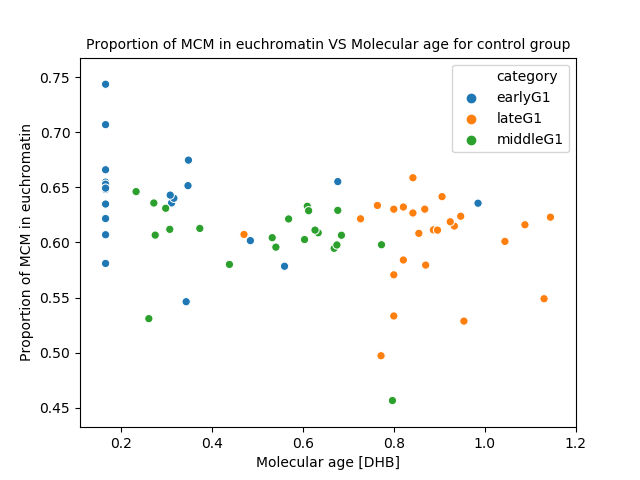

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age for control group')

In [20]:
%matplotlib notebook
data['temp']=data.nuc_mcm_eu/data.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age for control group', fontsize=10)

## 7.	How does MCM/DAPI changes in molecular time?

<IPython.core.display.Javascript object>


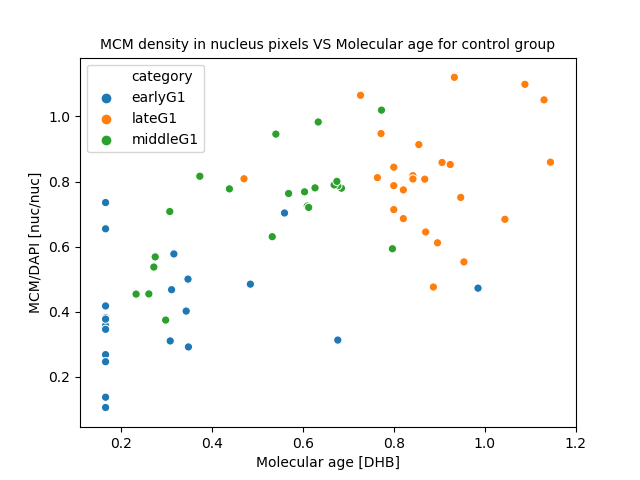

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age for control group')

In [21]:
%matplotlib notebook
data['temp']=data.nuc_mcm_total/data.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category]  & (data.mol_age_mod <1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age for control group', fontsize=10)

## 8.	How does MCM/DAPI changes in heterochromatin molecular time?

<IPython.core.display.Javascript object>


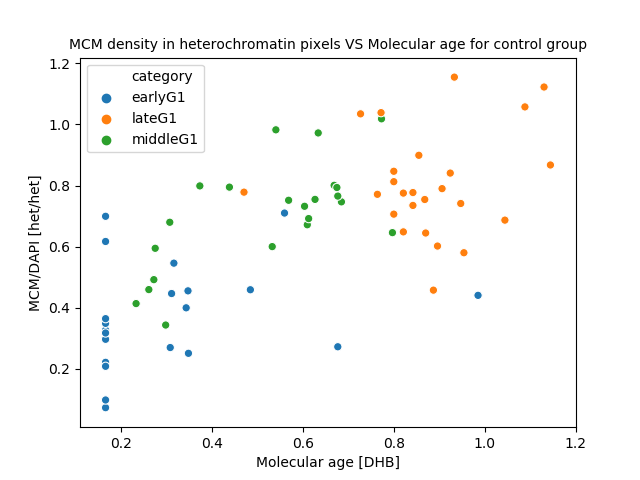

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age for control group')

In [22]:
%matplotlib notebook
data['temp']=data.nuc_mcm_het/data.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age for control group', fontsize=10)

## 9.	How does MCM/DAPI changes in euterochromatin molecular time?

<IPython.core.display.Javascript object>


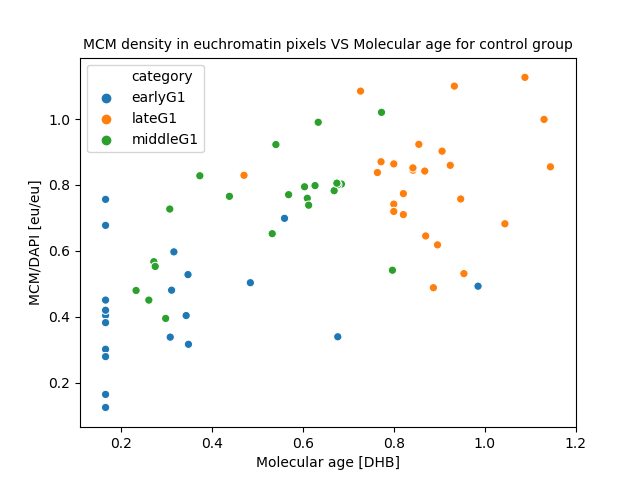

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age for control group')

In [23]:
%matplotlib notebook
data['temp']=data.nuc_mcm_eu/data.nuc_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age for control group', fontsize=10)

## 10. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


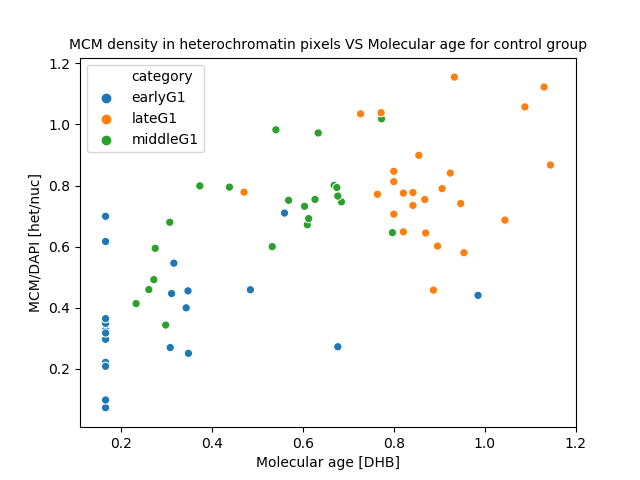

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age for control group')

In [24]:
%matplotlib notebook
data['temp']=data.nuc_mcm_het/data.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age for control group', fontsize=10)

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


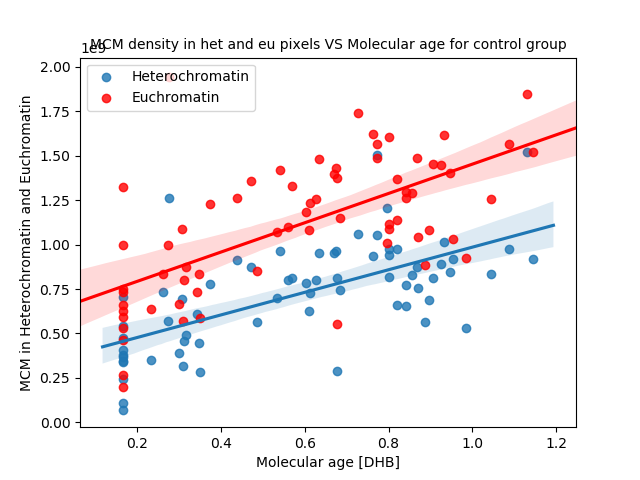

In [25]:
%matplotlib notebook
data['temp']=data.nuc_mcm_het
data['temp2']=data.nuc_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)),:], 
           color="r", label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age for control group', fontsize=10)
plt.legend(loc="upper left")



## #12.  mcm/dapi in heterochromatin/nucleus pixels vs molecular age

<IPython.core.display.Javascript object>


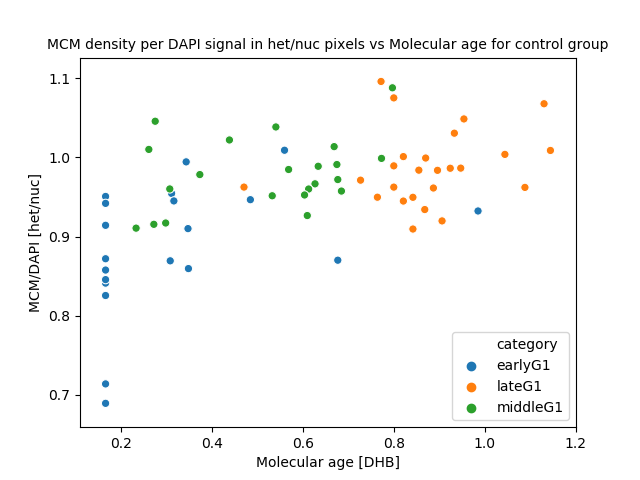

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age for control group')

In [26]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sn.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category] & (data.mol_age_mod < 1.2)), :], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age for control group', fontsize=10)